<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-1/blob/main/BusquedaPorCsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busqueda por embeddings en CSV

Este notebook es una continuación del notebook 'FaceRecognitionBueno.ipynb' ya que en él se explican los pasos que hemos dado para poder crear el '.csv' en el que se encuentran los embeddings.

Dicho esto, lo primero que vamos a hacer va a ser descargar todos los dataSet y el csv necesarios para el correcto funcionamiento del modelo.


## Descarga de materiales

Primero se comienza con la descarga del dataset en el cual se encuentran todas las fotos proporcionadas, que aunque no vamos a trabajar directamente con ellas, nos harán falta más adelante.

In [ ]:
!wget https://www.dropbox.com/s/chfwr4x475y3p1v/noticiasFotos.zip?dl=0 -O 2.zip
!unzip 2.zip

A continuación descargamos el 'csv' en el cual se encuentran recogidos los embeddings de las caras que aparecen en las fotos las cuales usaremos para comparar con el/los embeddings de la/las caras que se encuentren en la foto que se tomará como modelo.

In [3]:
!wget https://www.dropbox.com/s/lw24ve7ndobd4y5/EmbeddingsFotos.csv?dl=0 -O EmbeddingsFotos.csv

--2021-05-31 14:49:23--  https://www.dropbox.com/s/lw24ve7ndobd4y5/EmbeddingsFotos.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lw24ve7ndobd4y5/EmbeddingsFotos.csv [following]
--2021-05-31 14:49:24--  https://www.dropbox.com/s/raw/lw24ve7ndobd4y5/EmbeddingsFotos.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38dd6e8bc686b05a3c4236aeb0.dl.dropboxusercontent.com/cd/0/inline/BPh4rfjA5ZUvD8oQ5Ed2mBUx7sDb_7CSDQFkhzeYApyyKGx6ZfstXqsVeN7jzxL7hpzUfJG7Bp_1w7ISDuCRIlxEI-xfhqEJg8N7wLRhTiFQBzrKOY8ulBy_d3FbgWecVGzyLydS9tR73OT3rmZ3a45A/file# [following]
--2021-05-31 14:49:24--  https://uc38dd6e8bc686b05a3c4236aeb0.dl.dropboxusercontent.com/cd/0/inline/BPh4rfjA5ZUvD8oQ5Ed2mBUx7sDb_7CSDQFkhzeYApyyKGx6ZfstXqsVeN7jzxL

En este caso descargamos la imagen la cual vamos a utilizar para probar la funcionalidad del modelo. En este caso hemos elegido una imagen de la presidenta de La Rioja Concha Andreu.

In [4]:
!wget https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0 -O foto.zip
!unzip foto.zip

--2021-05-31 14:49:26--  https://www.dropbox.com/s/2t7n2q8b8gidjsh/foto.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2t7n2q8b8gidjsh/foto.zip [following]
--2021-05-31 14:49:26--  https://www.dropbox.com/s/raw/2t7n2q8b8gidjsh/foto.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8525e2619b2586d2cfcc8470e0.dl.dropboxusercontent.com/cd/0/inline/BPi8PmopISz8oIKeZlUbXzNAGU6L7Mnkmh9suSEf0c6N5AIe0lFEAWUPICUBO5-lQprRlLYVbBiGZKpor3KIs7DVPkEJOR70BbNTMhDhRxHNl_U-fnQN-E4ekz-VtNuYmGG3x2SJN9Y7-P8cj07RgXIq/file# [following]
--2021-05-31 14:49:27--  https://uc8525e2619b2586d2cfcc8470e0.dl.dropboxusercontent.com/cd/0/inline/BPi8PmopISz8oIKeZlUbXzNAGU6L7Mnkmh9suSEf0c6N5AIe0lFEAWUPICUBO5-lQprRlLYVbBiGZKpor3KIs7DVPkEJOR70

## Creación del modelo

Primero se importan las librerías necesarias para el correcto funcionamiento del modelo. La siguiente celda de código reune todas ellas.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Cargo el dataset en un dataFrame y muestro las primeras 5 líneas para comprobar si se ha cargado correctamente.

In [20]:
df = pd.read_csv('EmbeddingsFotos.csv')
df.head()

,NombreFoto,Embedding
0,462220.jpg 0,[[ 2.3611324 0.7700528 1.5315906 -1.38208...
1,462220.jpg 1,[[-0.18996963 0.47556552 0.3286136 1.53095...
2,44569.jpg 0,[[-0.67055297 -0.4772751 -0.05659456 0.97165...
3,44569.jpg 1,[[-8.7787104e-01 1.4074993e+00 -9.2881995e-01...
4,44569.jpg 2,[[ 0.55190855 0.47906682 -1.9257076 -0.58596...


Además quiero consultar la informacion general del dataFrame.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NombreFoto  10290 non-null  object
 1   Embedding   10290 non-null  object
dtypes: object(2)
memory usage: 160.9+ KB
None


Los dos son strings por lo que en el caso de los embeddings habrá que realizar la conversión de nuevo a un vector de 128 componentes.

### Métodos necesarios

Los métodos y los modelos preentrenados son los mismos que los que usamos en el notebook previo a este ('FaceRecognitionBueno.ipynb'), por lo que no voy a explicar de que se compone cada uno ya que está explicado completamente en dicho notebook.

In [9]:
!wget https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0 -O mobilenet_graph.pb
# Leer mobilenet_graph.pb
with tf.io.gfile.GFile('mobilenet_graph.pb','rb') as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as mobilenet:
    tf.import_graph_def(graph_def,name='')

--2021-05-31 14:49:31--  https://www.dropbox.com/s/uji1ufb009ic3m0/mobilenet_graph.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uji1ufb009ic3m0/mobilenet_graph.pb [following]
--2021-05-31 14:49:32--  https://www.dropbox.com/s/raw/uji1ufb009ic3m0/mobilenet_graph.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc93f37eb07dfebd4094c9143458.dl.dropboxusercontent.com/cd/0/inline/BPijmv2leosTgws0CQgttaUyR6bVN3Wu_sPuhqngvJcGZZwRBY9ArgfTxOnkzx8XraL9PfauWZf6IN6ICIdTrqAPdg-zGn_tqs03mwDokC_-k4mMAz73eaapgt2WS5TycnljqR8Y1BeguOkqhx5_Lu-6/file# [following]
--2021-05-31 14:49:32--  https://uc93f37eb07dfebd4094c9143458.dl.dropboxusercontent.com/cd/0/inline/BPijmv2leosTgws0CQgttaUyR6bVN3Wu_sPuhqngvJcGZZwRBY9ArgfTxOnkzx8Xra

In [10]:
!wget https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0 -O facenet_keras.h5

facenet = load_model('facenet_keras.h5')

--2021-05-31 14:49:35--  https://www.dropbox.com/s/z0o1of3580smtwr/facenet_keras.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z0o1of3580smtwr/facenet_keras.h5 [following]
--2021-05-31 14:49:36--  https://www.dropbox.com/s/raw/z0o1of3580smtwr/facenet_keras.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc050ae6838e575545bdf7d44a.dl.dropboxusercontent.com/cd/0/inline/BPhjIwGM8l1061rdhvQkyiNK8TehtEJPvAb_XeBcGg78_Kr4SCQYH41OVZ-mruhTbxCpmFhXlRsObEuLv1PHRqmgV0Dk2S-aDwK3nsmXvP5BpLfs8y6omuLRc65q1NWruNBFxCbmcWDHke3UZE8NPTKp/file# [following]
--2021-05-31 14:49:36--  https://ucbc050ae6838e575545bdf7d44a.dl.dropboxusercontent.com/cd/0/inline/BPhjIwGM8l1061rdhvQkyiNK8TehtEJPvAb_XeBcGg78_Kr4SCQYH41OVZ-mruhTbxCpmFhX

In [11]:
def load_image(DIR, NAME):
    return cv2.cvtColor(cv2.imread(f'{DIR}/{name}'), cv2.COLOR_BGR2RGB)

def detect_faces(image, score_threshold=0.7):
    global boxes, scores
    (imh, imw) = image.shape[:-1]
    img = np.expand_dims(image,axis=0)
    
    # Inicializar mobilenet
    sess = tf.compat.v1.Session(graph=mobilenet)
    image_tensor = mobilenet.get_tensor_by_name('image_tensor:0')
    boxes = mobilenet.get_tensor_by_name('detection_boxes:0')
    scores = mobilenet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (detección)
    (boxes, scores) = sess.run([boxes, scores], feed_dict={image_tensor:img})
    
    # Reajustar tamaños boxes, scores
    boxes = np.squeeze(boxes,axis=0)
    scores = np.squeeze(scores,axis=0)
    
    # Depurar bounding boxes
    idx = np.where(scores>=score_threshold)[0]
    
    # Crear bounding boxes
    bboxes = []
    for index in idx:
        ymin, xmin, ymax, xmax = boxes[index,:]
        (left, right, top, bottom) = (xmin*imw, xmax*imw, ymin*imh, ymax*imh)
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bboxes.append([left,right,top,bottom])
        
    return bboxes


def extract_faces(image,bboxes,new_size=(160,160)):
    cropped_faces = []
    for box in bboxes:
        left, right, top, bottom = box
        face = image[top:bottom,left:right]
        cropped_faces.append(cv2.resize(face,dsize=new_size))
    return cropped_faces

def compute_embedding(model,face):
    face = face.astype('float32')
    
    mean, std = face.mean(), face.std()
    face = (face-mean) / std
    
    face = np.expand_dims(face,axis=0)
    
    embedding = model.predict(face)
    return embedding

def compare_faces(embs_ref, emb_desc, umbral=10):
    distancias = []
    for emb_ref in embs_ref:
        distancias.append(np.linalg.norm(emb_ref-emb_desc))
    distancias = np.array(distancias)
    return distancias, list(distancias<=umbral)

def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

### Prueba con imagen

Se calcula el embedding de la foto a la que se quiere tomar como referencia, que además, más adelante también será útil para poder realizar el paso de String (como se encuentra los embeddings precalculados en el csv) a su formato

In [12]:
known_embeddings = []

print('Procesando rostros conocidos...')
for name in os.listdir('foto'):
    if name.endswith('.jpg'):
        print(f'   {name}')
        image = load_image('foto',name)
        bboxes = detect_faces(image)
        face = extract_faces(image,bboxes)
        known_embeddings.append(compute_embedding(facenet,face[0]))

Procesando rostros conocidos...
   conchaAndreu.jpg


Almaceno en la variable 'embeddingsModelo' el conjunto de embeddings que se encuentran el csv, para poder iterarlos con facilidad. Hago lo mismo con los nombres de las fotos para poder identificar cada embedding.

In [13]:
embeddingsModelo = df['Embedding']
nombreFoto = df['NombreFoto']

Muestro el formato que posee el embedding de la foto muestra para compararlo con el embedding el cual saco del csv y poder convertirlo correctamente, ya que lo ha almacenado como un string.

In [15]:
known_embeddings

[array([[ 0.16271378,  0.48621282,  1.8757733 , -0.8237932 ,  0.65940875,
         -0.3629448 ,  0.33533812,  0.7777411 , -0.45129365, -0.5489631 ,
         -0.06453061,  0.0870657 ,  1.7031118 ,  0.9023485 ,  0.16001502,
         -1.4287704 , -0.16216601, -0.4813192 ,  0.7864006 , -0.20852117,
         -0.905215  , -0.08942058, -0.47549418,  0.5858404 , -0.596419  ,
          0.2051493 , -0.8513644 ,  1.3090646 ,  0.48061842, -0.04805899,
         -0.776615  , -0.5880871 ,  0.75972813, -0.7453167 ,  0.01866461,
          0.5536673 , -0.24610794,  0.09339369, -0.9691724 ,  1.5265123 ,
          1.5485693 ,  1.0119599 ,  0.30268335,  0.30181786, -2.2646067 ,
          0.18283339, -0.99502933, -0.07626563,  0.24588485, -0.50420225,
          1.9102699 ,  2.2888114 ,  0.3953278 , -2.9916036 ,  0.11267579,
          1.0626606 ,  0.31108966,  0.3967505 ,  0.11094663, -0.6404616 ,
          0.9621406 , -1.744543  ,  0.7548506 ,  1.3502482 , -1.2542279 ,
         -0.4172296 , -0.09038731, -0.

Embedding del csv en bruto.

In [21]:
embeddingsModelo[1]

'[[-0.18996963  0.47556552  0.3286136   1.5309514   0.62813014 -0.13005841\n   0.10592152 -0.66462034 -0.6861267  -0.6047762   0.6668252  -0.5080282\n   1.4240074   0.6851475   1.7242337   0.5311054  -0.5076395  -1.4917814\n  -1.4583507   0.88369215 -0.5048027  -0.03305591 -0.10728723  0.3505311\n   0.18363258 -0.60061824  0.13972794  0.84549934 -2.3456595   0.5540586\n  -0.17170511 -0.88935643 -0.74024487 -0.27362347 -0.26249826  1.2041694\n  -1.7959503  -0.39499325 -0.8599583   1.4153278   1.244695   -0.57961404\n   0.7124711  -0.47363117  0.913836   -1.6095527   2.4872813   0.7789227\n   1.4479051   0.1625808   0.5713562  -0.21613742  0.94967526 -2.4467711\n   0.1285314  -1.7116238   1.0727617   0.9707922   0.76895183  1.925824\n   0.5498862  -0.92531645  0.11586294 -1.1201551   0.40122917 -3.191715\n   0.09011545 -0.9434534  -1.0525503   1.3918947   0.8021957  -0.9103023\n   0.11099075  0.8200471  -0.74979705 -0.44416964  1.6260998   1.9299772\n  -0.10566363  0.41638696  0.01357811

Como se vé, hace falta hacer la conversión, por lo que a continuación la realizo para adaptarse al formato del embedding de la foto de referencia.

In [16]:
lista=embeddingsModelo[1].replace('[','').replace(']','').split(' ')
aux=[]
for elem in lista:
  if elem != '':
    aux.append(float(elem))
aux2=[]
aux2.append(aux)    
fin=[np.array(aux2, dtype='f')]

fin

[array([[-0.18996963,  0.47556552,  0.3286136 ,  1.5309514 ,  0.62813014,
         -0.13005841,  0.10592152, -0.66462034, -0.6861267 , -0.6047762 ,
          0.6668252 , -0.5080282 ,  1.4240074 ,  0.6851475 ,  1.7242337 ,
          0.5311054 , -0.5076395 , -1.4917814 , -1.4583507 ,  0.88369215,
         -0.5048027 , -0.03305591, -0.10728723,  0.3505311 ,  0.18363258,
         -0.60061824,  0.13972794,  0.84549934, -2.3456595 ,  0.5540586 ,
         -0.17170511, -0.88935643, -0.74024487, -0.27362347, -0.26249826,
          1.2041694 , -1.7959503 , -0.39499325, -0.8599583 ,  1.4153278 ,
          1.244695  , -0.57961404,  0.7124711 , -0.47363117,  0.913836  ,
         -1.6095527 ,  2.4872813 ,  0.7789227 ,  1.4479051 ,  0.1625808 ,
          0.5713562 , -0.21613742,  0.94967526, -2.4467711 ,  0.1285314 ,
         -1.7116238 ,  1.0727617 ,  0.9707922 ,  0.76895183,  1.925824  ,
          0.5498862 , -0.92531645,  0.11586294, -1.1201551 ,  0.40122917,
         -3.191715  ,  0.09011545, -0.

Una vez conocemos que hay que hacer para realizar la conversión, solo hace falta aplicarla en el bucle que recorre los distintos embeddings. En el caso que el modelo reconozca una similitud entre embeddings, se busca en 'nombreFoto' el nombre de la imagen en la posición en la que se encuentra el embedding. Por ejemplo, si se ha encontrado similitud en un embedding en la posición 5, se busca en nombreFoto en la posición 5. Posteriormente se muestra la imagen.

188.jpg


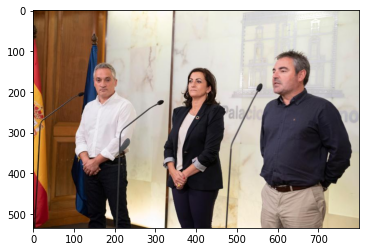

1126.jpg


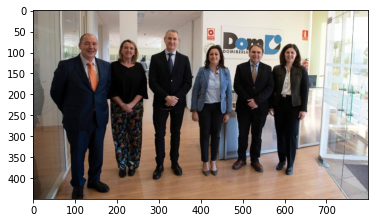

473680.jpg


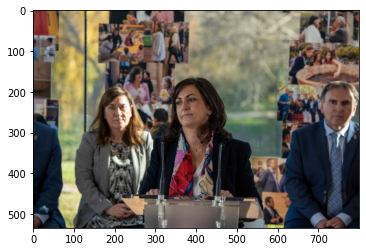

1303.jpg


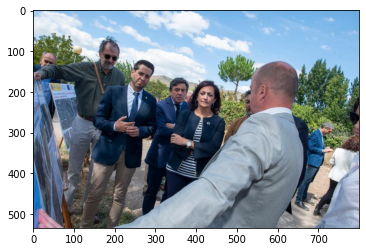

473943.jpg


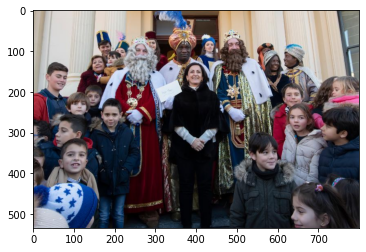

473892.jpg


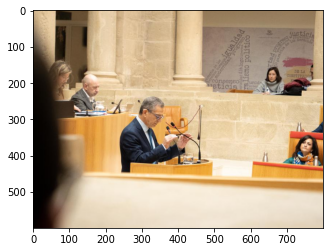

10290


In [17]:
cont=0
for caraEmb in embeddingsModelo:  
  lista=caraEmb.replace('[','').replace(']','').split(' ')
  aux=[]
  for elem in lista:
    if elem != '':
      aux.append(float(elem))
  aux2=[]
  aux2.append(aux)    
  fin=[np.array(aux2, dtype='f')]

  _, reconocimiento = compare_faces(known_embeddings,fin)

  if any(reconocimiento):
    nomF=nombreFoto[cont].split(' ')[0]
    print(nomF)
    image = cv2.imread("2/"+nomF)
    mostrarImagen(image)

  cont=cont+1;
    

print(cont)